https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

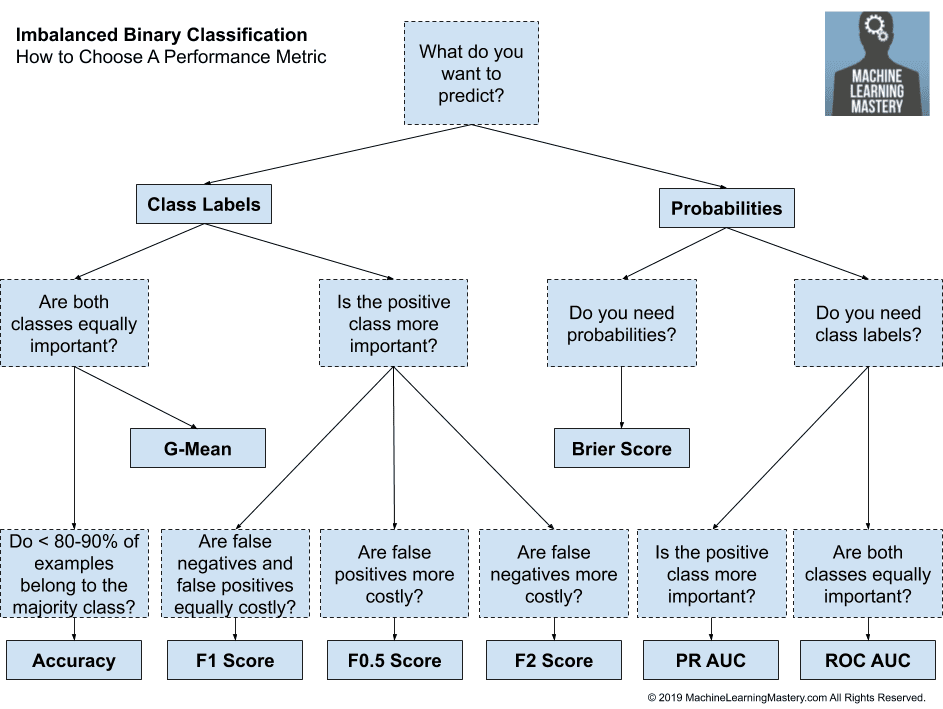

# Base model

In [ ]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Loading the breast cancer data set
diabetes_data = load_breast_cancer()

# Creating independent and dependent variables
X = diabetes_data.data
y = diabetes_data.target

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

Train Data: (455, 30), (455,)
Train Data: (114, 30), (114,)


## Accuracy
The accuracy of a classifier is calculated as the ratio of the total number of correctly predicted samples by the total number of samples.

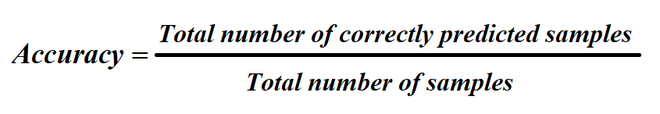

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9473684210526315


## Confusion Matrix
A confusion matrix is an N dimensional square matrix, where N represents total number of target classes or categories. Confusion matrix can be used to evaluate a classifier whenever the data set is imbalanced. Let us consider a binary classification problem i.e. the number of target classes are 2. A typical confusion matrix with two target classes (say “Yes” and “No”) looks like:

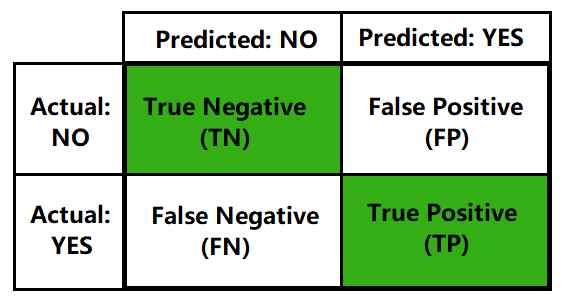

There are four important terms in a confusion matrix

1. True Positives (TP): These are the cases where the predicted “Yes” actually belonged to class “Yes”.
2. True Negatives (TN): These are the cases where the predicted “No” actually belonged to class “No”.
3. False Positives (FP): These are the cases where the predicted “Yes” actually belonged to class “No”.
4. False Negatives (FN): These are the cases where the predicted “No” actually belonged to class “Yes”.

[[39  2]
 [ 4 69]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


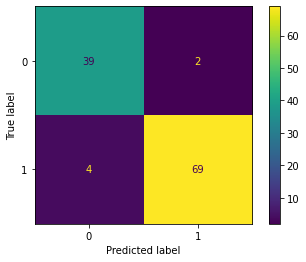

In [ ]:
# importing all necessary libraries
import matplotlib.plot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

## Precision (or Positive Predictive Value)
Precision is the ratio of true positives (TP) by the sum of true positives (TP) and false positives (FP).

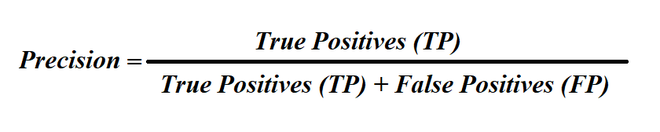

Take an example use case of spam detection. If our model detects a mail as spam which was not actually a spam mail then the user might miss an important mail i.e. here false positives should be reduced. So, in this use case we need to use precision as a metric to measure the quality of our classifier.

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.971830985915493


## Recall (or Sensitivity or True Positive Rate)
Recall is the ratio of true positives (TP) by the sum of true positives (TP) and false negatives (FN).
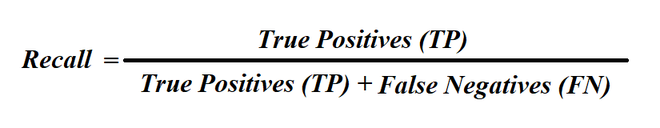

Take an example use case of cancer prediction. Consider a person who is actually having cancer but was predicted as a non-cancer patient by our classifier which can lead to mistreatment of the person i.e. here false negatives should be reduced. So, in this case, we need to use recall as a metric to measure the quality of our classifier.

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.9452054794520548


## F1 Score
F1 score should be used when both precision and recall are important for the use case. F1 score is the harmonic mean of precision and recall. It lies between [0,1].
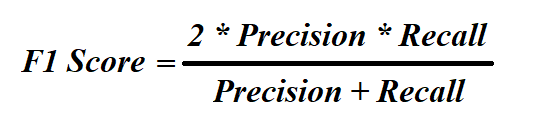


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

F1 Score of the classifier is: 0.9583333333333334


## AUC-ROC Curve
AUC-ROC Curve is a performance metric that is used to measure the performance for the classification model at different threshold values. ROC is Receiver Operating Characteristic Curve and AUC is Area Under Curve. The higher the value of AUC (Area under the curve), the better is our classifier in predicting the classes. AUC-ROC is mostly used in binary classification problems.


The ROC curve is plotted between True Positive Rate (TPR) and False Positive Rate (FPR) i.e. TPR on the y-axis and FPR on the x-axis. AUC is the area under the ROC curve. An excellent classifier has an AUC value near 1, whereas a poor-performing classifier has an AOC value near 0. A classifier with an AOC score of 0.5 doesn’t have any class separation capacity.

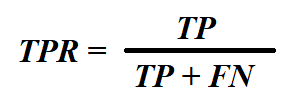

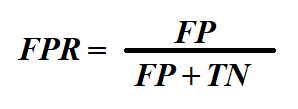

AUC for our classifier is: 0.9769462078182426


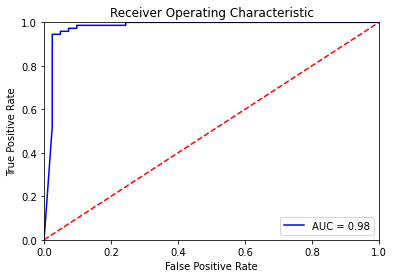

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Precision-Recall Curve
To find the best threshold value based on the trade-off between precision and recall, precision_recall_curve is drawn. 

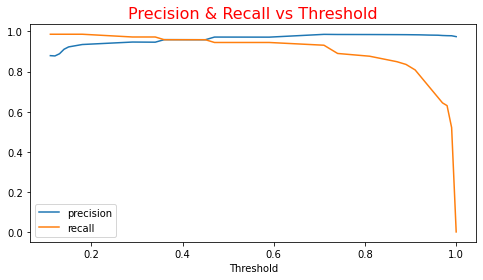

In [ ]:
from sklearn import metrics
pre, rec, thr = metrics.precision_recall_curve(y_test, preds)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show() 

# Mathew Coreleation coefficient

The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient.

In [ ]:
from sklearn.metrics import matthews_corrcoef

# Calculating the F1 score of classifier
print(f"matthews corrcoef Score of the classifier is: {matthews_corrcoef(y_test, predictions)}")

matthews corrcoef Score of the classifier is: 0.8875726517394207


## Hamming Loss
Hamming loss is the fraction of targets that are misclassified. The best value of the hamming loss is 0 and the worst value is 1. It can be calculated as 

## Jaccard Score
Jaccard score is defined as the ratio of the size of the intersection to the size of the union of label classes between predicted labels and ground truth labels. It is considered a similarity coefficient to compare the predicted classes and true classes. The value of 1 denotes the best classification and 0 denotes the worst. Jaccard loss is considered a poor choice if the class distribution is imbalanced.

## Cross-entropy loss(Log_loss)
Cross-entropy loss, also known as log loss, becomes famous in deep neural networks because of its ability to overcome vanishing gradient problems. It measures the impurity caused by misclassification. The cross-entropy loss is calculated as the summation of the logarithmic value of prediction probability distribution for misclassified data points. 

In [ ]:
# Entropy loss
cross_entropy_loss = metrics.log_loss(y_test, preds)
cross_entropy_loss

0.4033861188250463

In [ ]:
import numpy as np
def cross_entropy(yhat, y):
  if y == 1:
    return -np.log(yhat)
  else:
    return -np.log(1-yhat)

## G-Mean

The `Geometric Mean or G-Mean` is a metric for `imbalanced classification` that, if optimized, will seek a `balance between` the `sensitivity` and the `specificity`.

Firstly, the `true positive rate` is called the `Sensitivity`. The `inverse of the false-positive rate is called the Specificity`.

+ `Sensitivity = TruePositive / (TruePositive + FalseNegative)`
+ `Specificity = TrueNegative / (FalsePositive + TrueNegative)`

Where:

+ `Sensitivity = True Positive Rate`
+ `Specificity = 1 – False Positive Rate`

`G-Mean = sqrt(Sensitivity * Specificity)`

https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

In [ ]:
# calculate roc curves
fpr, tpr, threshold = roc_curve(y_test, preds)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.710000, G-Mean=0.960


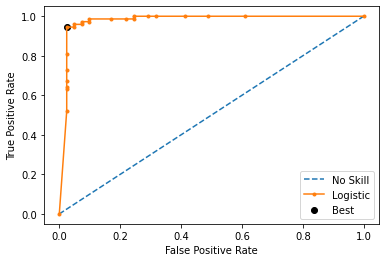

In [ ]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

The threshold is then used to locate the true and false positive rates, then this point is drawn on the ROC Curve.

We can see that the point for the optimal threshold is a large black dot and it appears to be closest to the top-left of the plot.

#### It turns out there is a much faster way to get the same result, called the `Youden’s J statistic`.

The `statistic` is calculated as:

`J = Sensitivity + Specificity – 1`
Which we can restate as:

`J = TruePositiveRate – FalsePositiveRate`

In [ ]:
# calculate roc curves
fpr, tpr, threshold = roc_curve(y_test, preds)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = threshold[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.710000
